In [1]:
import pandas as pd
import numpy as np
import pycountry
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from yandex_translate import YandexTranslate
from yandex_translate import YandexTranslateException

YANDEX_API_KEY ='ab363e38-952b-40b8-a4a3-a033525d79a8'
try:
    translate_obj = YandexTranslate(YANDEX_API_KEY)
except YandexTranslateException:
    translate_obj = None

PLOT_LABEL_FONT_SIZE = 14 
def getColors(n):
    COLORS = []
    cm = plt.cm.get_cmap('hsv', n)
    for i in np.arange(n):
        COLORS.append(cm(i))
    return COLORS

def translate(string, translator_obj=None):
    if translator_class == None:
        return string
    t = translator_class.translate(string, 'en-ru')
    return t['text'][0]

def dict_sort(my_dict):
    keys = []
    values = []
    my_dict = sorted(my_dict.items(), key=lambda x:x[1], reverse=True)
    for k, v in my_dict:
        keys.append(k)
        values.append(v)
    return (keys,values)

df = pd.read_csv('.\scrubbed.csv', escapechar='`', low_memory=False)

df['shape'] = df['shape'].replace({None: 'unknown'})

country_label_count = pd.value_counts(df['country'].values)
for label in list(country_label_count.keys()):
    c = pycountry.countries.get(alpha_2=str(label).upper())
    t = translate(c.name, translate_obj)
    df = df.replace({'country':str(label)}, t)

shapes_label_count = pd.value_counts(df['shape'].values)
for label in list(shapes_label_count.keys()):
    t = translate(str(label), translate_obj)
    df = df.replace({'shape':str(label)}, t)

C:\Users\akylb\AppData\Local\Temp\ipykernel_29840\292570179.py:43: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  country_label_count = pd.value_counts(df['country'].values)


NameError: name 'translator_class' is not defined

C:\Users\akylb\AppData\Local\Temp\ipykernel_29840\2375682037.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  country_count = pd.value_counts(df['country'].values, sort=True)
C:\Users\akylb\AppData\Local\Temp\ipykernel_29840\292570179.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('hsv', n)


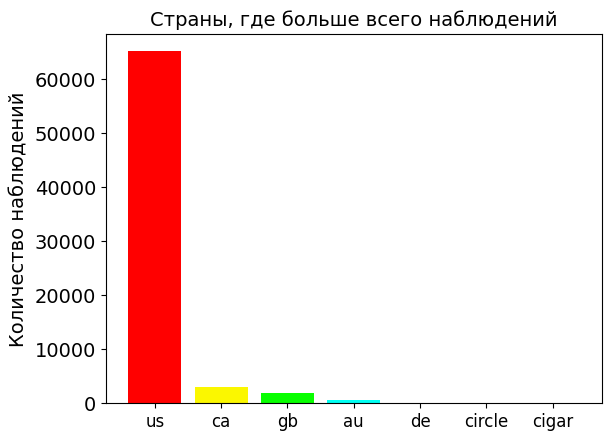

In [2]:
country_count = pd.value_counts(df['country'].values, sort=True)
country_count_keys, country_count_values = dict_sort(dict(country_count))    
TOP_COUNTRY = len(country_count_keys)
plt.title('Страны, где больше всего наблюдений', fontsize=PLOT_LABEL_FONT_SIZE)
plt.bar(np.arange(TOP_COUNTRY), country_count_values, color=getColors(TOP_COUNTRY))
plt.xticks(np.arange(TOP_COUNTRY), country_count_keys, rotation=0, fontsize=12)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Количество наблюдений', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

C:\Users\akylb\AppData\Local\Temp\ipykernel_29840\292570179.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('hsv', n)


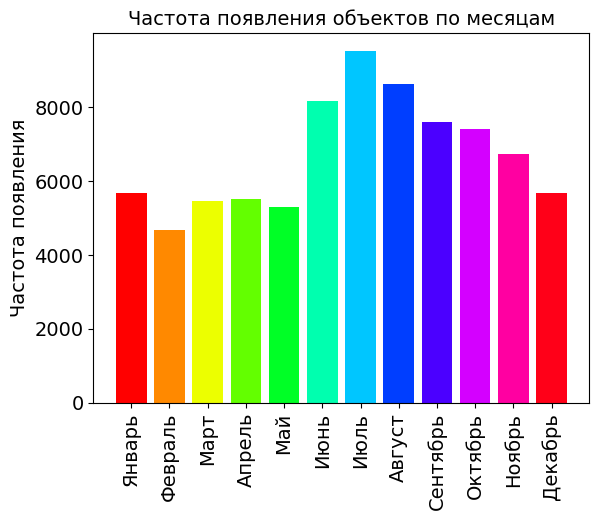

In [3]:
MONTH_COUNT = [0,0,0,0,0,0,0,0,0,0,0,0]
MONTH_LABEL = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
    'Июль', 'Август', 'Сентябрь' ,'Октябрь' ,'Ноябрь' ,'Декабрь']

for i in df['datetime']:
    m,d,y_t =  i.split('/')
    MONTH_COUNT[int(m)-1] = MONTH_COUNT[int(m)-1] + 1

plt.bar(np.arange(12), MONTH_COUNT, color=getColors(12))
plt.xticks(np.arange(12), MONTH_LABEL, rotation=90, fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Частота появления', fontsize=PLOT_LABEL_FONT_SIZE)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.title('Частота появления объектов по месяцам', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

C:\Users\akylb\AppData\Local\Temp\ipykernel_29840\910755072.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  shapes_type_count = pd.value_counts(df['shape'].values)


NameError: name 'shapes_type_count_values' is not defined

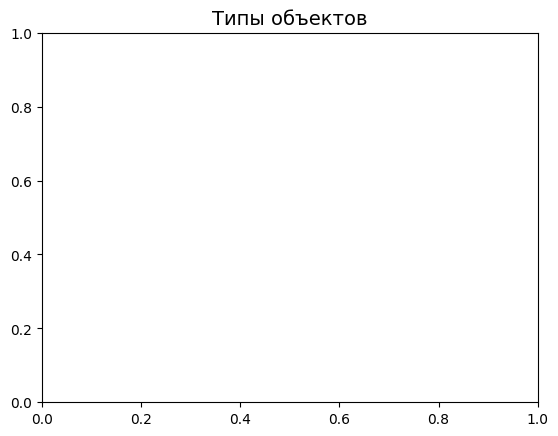

In [4]:
shapes_type_count = pd.value_counts(df['shape'].values)
shapes_type_count_keys, shapes_count_values = dict_sort(dict(shapes_type_count))
OBJECT_COUNT = len(shapes_type_count_keys)
plt.title('Типы объектов', fontsize=PLOT_LABEL_FONT_SIZE)
bar = plt.bar(np.arange(OBJECT_COUNT), shapes_type_count_values, color=getColors(OBJECT_COUNT))
plt.xticks(np.arange(OBJECT_COUNT), shapes_type_count_keys, rotation=90, fontsize=PLOT_LABEL_FONT_SIZE)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Сколько раз видели', fontsize=PLOT_LABEL_FONT_SIZE)
plt.show()

In [5]:
shapes_durations_dict = {}
for i in shapes_type_count_keys:
    dfs = df[['duration (seconds)', 'shape']].loc[df['shape'] == i]
shapes_durations_dict[i] = dfs['duration (seconds)'].median(axis=0)/60.0/60.0

shapes_durations_dict_keys = []
shapes_durations_dict_values = []

for k in shapes_type_count_keys:
    shapes_durations_dict_keys.append(k)
    shapes_durations_dict_values.append(shapes_durations_dict[k])
plt.title('Среднее время появление каждого объекта', fontsize=12)
plt.bar(np.arange(OBJECT_COUNT), shapes_durations_dict_values, color=getColors(OBJECT_COUNT))
plt.xticks(np.arange(OBJECT_COUNT), shapes_durations_dict_keys, rotation=90, fontsize=16)
plt.ylabel('Среднее время появления в часах', fontsize=12)
plt.show()

TypeError: Cannot convert ['2-3 seconds'] to numeric